In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, Activation

**Question 1: A.** Load CIFAR-10 datafrom KerasLibrary andsplit itusing theTrain-and-Testmethod(90, 10).Allot the 90% data to Training and the rest 10% to Testing. 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X=np.concatenate((x_train,x_test), axis=0)
y=np.concatenate((y_train,y_test), axis=0)
print(np.shape(X))
print(np.shape(y))

(60000, 32, 32, 3)
(60000, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10)

In [5]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(54000, 32, 32, 3)
(54000, 1)
(6000, 32, 32, 3)
(6000, 1)


**B.** Reshape and normalize the data:

Hint:

●Reshape the input imageas demonstrated below:○train:50000,32 * 32 * 3○test:10000, 32 * 32*3

●Change the type of data to float32

●Normalize the data by dividingeachwith 255

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)
print(np.shape(X_train))
print(np.shape(X_test))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0


(54000, 32, 32, 3)
(6000, 32, 32, 3)


**Question 2:** Convert the y_trainand y_testto categoricalby usingthe functiontf.Keras.utilis_to_categorical

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**QUESTION 3:** Create a single layer perceptron with

Hint:

●Single dense 2056 neurons

> ○input shape being 3072

> ○Activation function ReLU.

●Softmax layer with 10 neurons as output

●loss-categorical_crossentropy

> ○Optimizer-Adam

●batch_size = 1000; epochs = 50

In [8]:
model = Sequential()
model.add(Flatten())
model.add(tf.keras.Input(shape=(3072,)))
model.add(Dense(2056, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=50)

Epoch 1/50
54/54 [==============================] - 25s 441ms/step - loss: 3.7278 - accuracy: 0.2039
Epoch 2/50
54/54 [==============================] - 24s 442ms/step - loss: 1.9103 - accuracy: 0.3256
Epoch 3/50
54/54 [==============================] - 24s 441ms/step - loss: 1.8211 - accuracy: 0.3635
Epoch 4/50
54/54 [==============================] - 24s 442ms/step - loss: 1.7537 - accuracy: 0.3888
Epoch 5/50
54/54 [==============================] - 24s 442ms/step - loss: 1.7044 - accuracy: 0.4065
Epoch 6/50
54/54 [==============================] - 24s 441ms/step - loss: 1.6648 - accuracy: 0.4171
Epoch 7/50
54/54 [==============================] - 24s 441ms/step - loss: 1.6320 - accuracy: 0.4296
Epoch 8/50
54/54 [==============================] - 24s 440ms/step - loss: 1.6053 - accuracy: 0.4389
Epoch 9/50
54/54 [==============================] - 24s 443ms/step - loss: 1.5796 - accuracy: 0.4487
Epoch 10/50
54/54 [==============================] - 24s 442ms/step - loss: 1.5646 - accura

Print the accuracy and loss of SLP model.

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

188/188 [==============================] - 3s 14ms/step - loss: 1.3763 - accuracy: 0.5230
Test loss 1.3763177394866943
Test accuracy 0.5230000019073486


In [12]:
X_new = X_test[:10]
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
#np.array(class_names)[y_red]
y_new = y_test[:10]
print(y_new)

[1 0 3 4 9 6 4 1 1 3]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


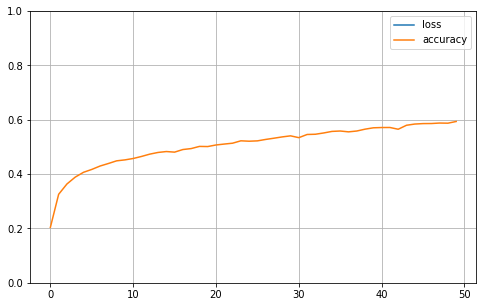

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Question 4:** Create a Multi-Layer Perceptron with

Hint:

●Single dense layer 2056 neurons

> ○Input shape being 3072

> ○Activation function ReLU

●Second Dense Layer 1024 neurons and activation ReLU

●Third Dense Layer 512 neurons and activation ReLU

●Fourth Dense Layer 512 neurons and activation ReLU

●Softmax layer with 10 neurons as output

●loss-categorical_crossentropy

> ○Optimizer -Adam

●batch_size = 1000; epochs = 50

In [14]:
model_mlp = Sequential()
model_mlp.add(Flatten())
model_mlp.add(tf.keras.Input(shape=(3072,)))
model_mlp.add(Dense(2056, activation='relu'))
model_mlp.add(Dense(1024, activation='relu'))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))

In [15]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history_mlp = model_mlp.fit(X_train, y_train, batch_size=1000, epochs=50)

Epoch 1/50
54/54 [==============================] - 42s 755ms/step - loss: 2.2845 - accuracy: 0.1890
Epoch 2/50
54/54 [==============================] - 40s 746ms/step - loss: 1.8983 - accuracy: 0.3083
Epoch 3/50
54/54 [==============================] - 40s 746ms/step - loss: 1.7519 - accuracy: 0.3704
Epoch 4/50
54/54 [==============================] - 40s 744ms/step - loss: 1.6732 - accuracy: 0.4014
Epoch 5/50
54/54 [==============================] - 40s 749ms/step - loss: 1.6031 - accuracy: 0.4286
Epoch 6/50
54/54 [==============================] - 40s 746ms/step - loss: 1.5627 - accuracy: 0.4405
Epoch 7/50
54/54 [==============================] - 41s 751ms/step - loss: 1.5147 - accuracy: 0.4589
Epoch 8/50
54/54 [==============================] - 41s 751ms/step - loss: 1.4707 - accuracy: 0.4742
Epoch 9/50
54/54 [==============================] - 41s 752ms/step - loss: 1.4251 - accuracy: 0.4933
Epoch 10/50
54/54 [==============================] - 41s 760ms/step - loss: 1.4113 - accura

Print the accuracy and loss of MLP model

In [17]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(X_test, y_test)
print('Test loss (MLP)', test_loss_mlp)
print('Test accuracy (MLP)', test_acc_mlp)

188/188 [==============================] - 4s 23ms/step - loss: 2.2946 - accuracy: 0.5415
Test loss (MLP) 2.2946231365203857
Test accuracy (MLP) 0.5414999723434448


In [18]:
X_new = X_test[:10]
predict_x=model_mlp.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
#np.array(class_names)[y_red]
y_new = y_test[:10]
print(y_new)

[1 0 9 4 9 6 2 1 1 6]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


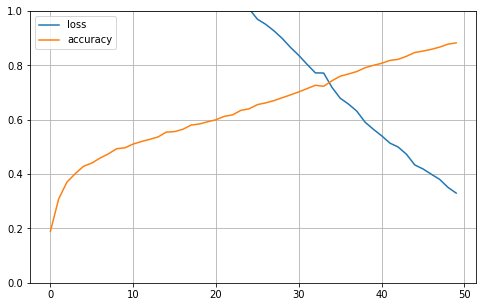

In [19]:
pd.DataFrame(history_mlp.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Question5:** Create a CNN Modelusing the hint mentioned below.

Hint:

-Load CIFAR10 data 

-Convert TrainandTest type to float32

-Normalize the data by dividing each by 255 

-Convert Y to categoricalencoding by using to_categorical

In [20]:

# class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [21]:

X_train=X_train/255.0
print(X_train.shape)

X_test=X_test/255.0
X_test.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

In [26]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [27]:
y_train.shape

(50000, 10)

CNN Layer: 

-Layer 1

> -two Conv2d Layer with 32 filter of (3,3) with input_shape= x_train.shape[1:] 

> -maxpool 2d with 2,2 filter 

> -activation ReLU

> -dropout 0.25 

-Layer 2

> -two Conv2d Layer with 64 filter of (3,3) 

> -maxpool 2d with 2,2 filter 

> -activation ReLU

> -dropout 0.25 

-Layer 3 

> -Flatten Layer 

> -Dense Layer with 512 Neuron with Relu 

> -Dropout 0.25 

> -Dense Layer with 10 Neuron with softmaz Activation 



In [28]:
model_cnn=Sequential()

model_cnn.add(Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model_cnn.add(Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
model_cnn.add(Dropout(0.25))
model_cnn.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model_cnn.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(units=512,activation='relu'))
model_cnn.add(Dropout(0.25,noise_shape=None,seed=None))
model_cnn.add(Dense(units=10,activation='softmax'))
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

-Compile the model with RmsProp optimizer and categorical_crossentropy loss



In [29]:
model_cnn.compile(loss="categorical_crossentropy", optimizer="RmsProp", metrics=['accuracy'])

-Fit model with batch_size=5000, epochs=20



In [30]:
history_cnn = model_cnn.fit(X_train, y_train, batch_size=5000, epochs=20)

Epoch 1/20
10/10 [==============================] - 258s 26s/step - loss: 2.3246 - accuracy: 0.1255
Epoch 2/20
10/10 [==============================] - 253s 25s/step - loss: 2.2796 - accuracy: 0.1775
Epoch 3/20
10/10 [==============================] - 257s 26s/step - loss: 2.1713 - accuracy: 0.2330
Epoch 4/20
10/10 [==============================] - 254s 25s/step - loss: 2.1574 - accuracy: 0.2242
Epoch 5/20
10/10 [==============================] - 252s 25s/step - loss: 2.0654 - accuracy: 0.2779
Epoch 6/20
10/10 [==============================] - 253s 25s/step - loss: 1.9487 - accuracy: 0.3190
Epoch 7/20
10/10 [==============================] - 253s 25s/step - loss: 1.9155 - accuracy: 0.3385
Epoch 8/20
10/10 [==============================] - 252s 25s/step - loss: 1.8126 - accuracy: 0.3599
Epoch 9/20
10/10 [==============================] - 253s 25s/step - loss: 1.7456 - accuracy: 0.3871
Epoch 10/20
10/10 [==============================] - 253s 25s/step - loss: 1.8004 - accuracy: 0.3693

-Print the accuracy and loss

In [31]:
test_loss_cnn, test_acc_cnn = model_mlp.evaluate(X_test, y_test)
print('Test loss (CNN)', test_loss_cnn)
print('Test accuracy (CNN)', test_acc_cnn)

313/313 [==============================] - 7s 22ms/step - loss: 0.5125 - accuracy: 0.8550
Test loss (CNN) 0.512503981590271
Test accuracy (CNN) 0.8550000190734863


In [32]:
X_new = X_test[:10]
predict_x=model_cnn.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
#np.array(class_names)[y_red]
y_new = y_test[:10]
print(y_new)

[5 1 8 0 3 6 1 6 3 1]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


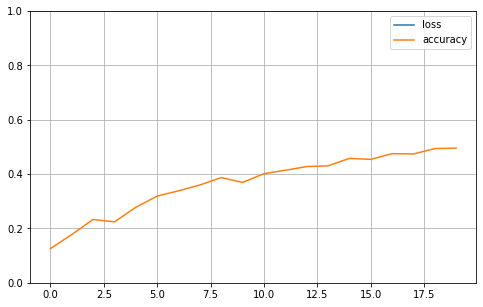

In [33]:
pd.DataFrame(history_cnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()